# Esercitazione 5 - SVM e Kernel

Oggi introduciamo l'algoritmo Support Vector Machine e i Kernel.

<a target="_blank" href="https://colab.research.google.com/github/zangobot/BusinessAnalytics_TeachingMaterial/blob/main/Esercitazione%205%20-%20SVM%20e%20Kernel.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Support Vector Machines

Support Vector Machine (SVM) è un algoritmo predittivo che calcola la retta che meglio divide i dati, massimizzando il margine:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1920px-SVM_margin.png" width=800>

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('dati/penguins_size.csv').dropna()

In [73]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, encoder, **params):
    Z = encoder.transform(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_decision_region(clf, X, Y, title, x_label, y_label, classes, color='rgb'):
    colors = cycle(color)
    encoder = LabelEncoder().fit(Y)
    X0, X1 = X[x_label], X[y_label]
    xx, yy = make_meshgrid(X0, X1)
    fig, ax = plt.subplots()
    plot_contours(ax, clf, xx, yy, encoder, cmap=plt.cm.coolwarm, alpha=0.8)
    for c in classes:
        X[Y == c].plot.scatter(x_label, y_label, ax=ax, color=next(colors), label=c)
    ax.set_title(title)

/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


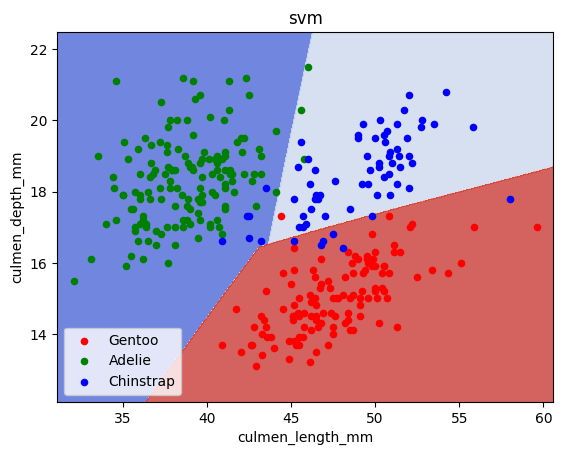

In [74]:
from sklearn.svm import SVC

X, Y = data[['culmen_length_mm', 'culmen_depth_mm']], data['species']

svm = SVC()
svm.fit(X, Y)
plot_decision_region(svm, X, Y, 'svm', 'culmen_length_mm', 'culmen_depth_mm', classes=["Gentoo", "Adelie", "Chinstrap"])

# Kernel

Introduciamo la non-linearità all'interno degli alforitmi predittivi, tramite i kernel.

Per capire come funzionano le distanze calcolate dai kernel, usiamo scikit-learn per caclolare i seguenti kernel:

* **Kernel Lineare**: $k(x_i, x_j) = x_i^tx_j$
* **Kernel Gaussiano (o Radial Base Function)**: $k(x_i, x_j) = e^{-\gamma \parallel x_i - x_j \parallel_2^2}$
* **Kernel Polinomiale**: $k(x_i, x_j) = (\gamma x_i^t x_j)^d$

Creiamo dei plot di queste funzioni per capire come si comportano.

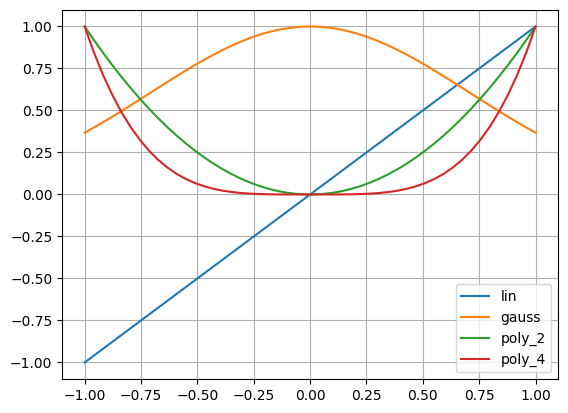

In [75]:
import numpy as np


def linear(x):
    return x


def gaussian(x, gamma):
    return np.exp(-gamma * pow(x, 2))


def polynomial(x, degree, gamma):
    return pow(gamma * x, degree)


t = np.linspace(-1, 1)
y_lin = linear(t)
y_gauss = gaussian(t, gamma=1)
y_poly2 = polynomial(t, degree=2, gamma=1)
y_poly4 = polynomial(t, degree=4, gamma=1)

plt.plot(t, y_lin, label='lin')
plt.plot(t, y_gauss, label='gauss')
plt.plot(t, y_poly2, label='poly_2')
plt.plot(t, y_poly4, label='poly_4')
plt.grid(True)
plt.legend()

Da questa visualizzazione possiamo notare che i kernel non lineari si comportano molto diversamente allontanandosi / avvicinandosi a 0.
Intuitivamente, cosa possiamo quindi aspettarci mentre usiamo queste funzioni?

Ora applichiamo i kernel ai dati dei pinguini:

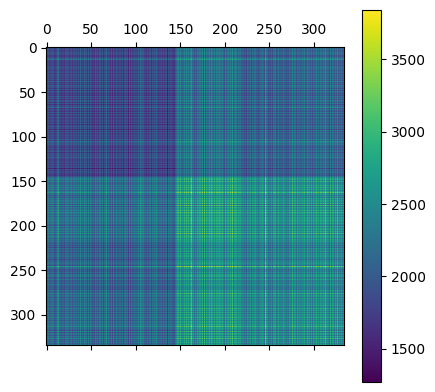

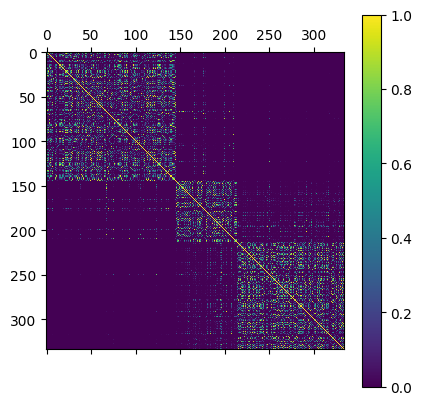

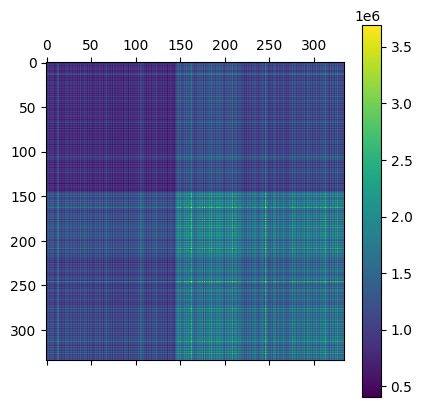

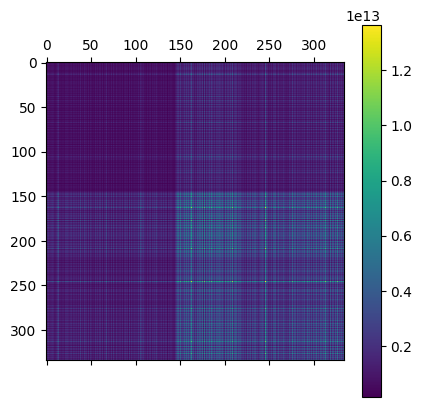

In [76]:
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel

K_1 = linear_kernel(X)
K_2 = rbf_kernel(X)
K_3 = polynomial_kernel(X, degree=2)
K_4 = polynomial_kernel(X, degree=4)

plt.matshow(K_1)
plt.colorbar()
plt.matshow(K_2)
plt.colorbar()
plt.matshow(K_3)
plt.colorbar()
plt.matshow(K_4)
plt.colorbar()


Come potete osservare, quasi tutti i kernel isolano tre aree all'interno dei dati.
Cosa pensate possa significare?

## Effetto dei parametri del kernel sulla regressione

Iniziamo ad inserire i kernel dentro gli algoritmi predittivi.
Per capirne meglio l'utilizzo, creiamo una funzione da far imparare ad un regressore (Ridge).

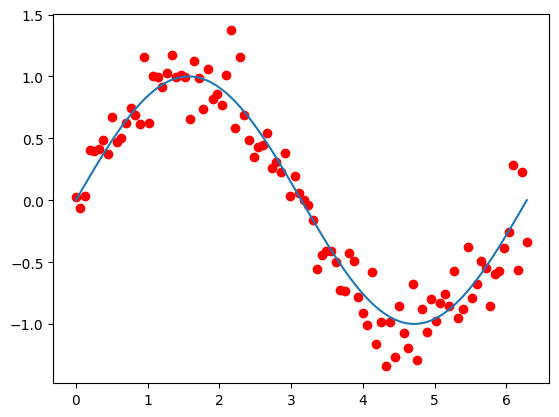

In [77]:
t = np.linspace(0, 2 * np.pi, 100, np.pi / 100).reshape(-1, 1)
noise = np.random.randn(*t.shape) * 0.2
real = np.sin(t)
x = np.sin(t) + noise

plt.plot(t, real)
plt.scatter(t, x, c='r')

/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


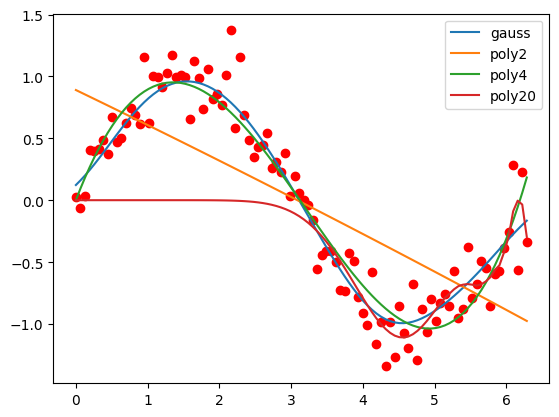

In [78]:
from sklearn.kernel_ridge import KernelRidge

krdige_gauss = KernelRidge(kernel='rbf', gamma=1).fit(t, x)
krdige_poly2 = KernelRidge(kernel='poly', gamma=1, degree=2).fit(t, x)
krdige_poly4 = KernelRidge(kernel='poly', gamma=1, degree=4).fit(t, x)
krdige_poly20 = KernelRidge(kernel='poly', gamma=1, degree=20).fit(t, x)

plt.scatter(t, x, c='r')
plt.plot(t, krdige_gauss.predict(t), label='gauss')
plt.plot(t, krdige_poly2.predict(t), label='poly2')
plt.plot(t, krdige_poly4.predict(t), label='poly4')
plt.plot(t, krdige_poly20.predict(t), label='poly20')
plt.legend()


Che cosa possiamo notare? Che cosa succede al variare dei parametri del kernel polinomiale?

L'effetto dei kernel dentro SVM è il seguente:

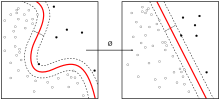

In [79]:
from IPython.core.display import SVG

display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/f/fe/Kernel_Machine.svg'))

Creiamo ora diverse SVM con diversi kernel usando i dati dei pinguini, cercando di capire che effetto hanno sulla classificazione.

/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/zangobot/opt/miniconda3/envs/tai/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


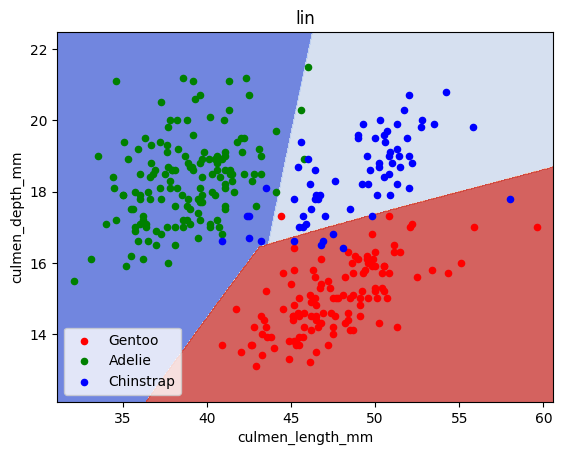

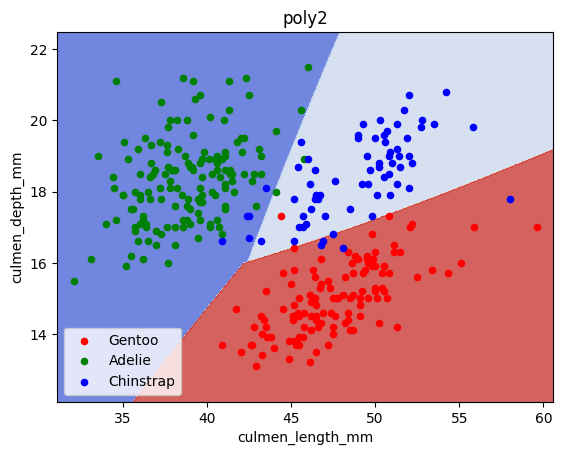

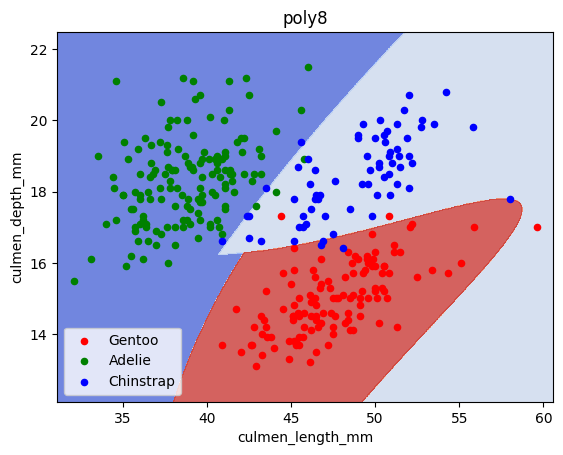

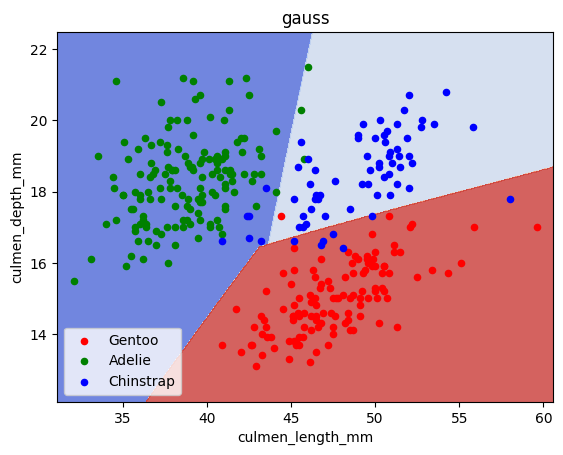

In [80]:
from sklearn.svm import SVC

lin_svm = SVC()
poly2_svm = SVC(kernel='poly', degree=2)
poly8_svm = SVC(kernel='poly', degree=8)
gauss_svm = SVC(kernel='rbf')

clfs = [(lin_svm, 'lin'), (poly2_svm, 'poly2'), (poly8_svm, 'poly8'), (gauss_svm, 'gauss')]

X, Y = data[['culmen_length_mm', 'culmen_depth_mm']], data['species']

for c, name in clfs:
    c.fit(X, Y)
    plot_decision_region(c, X, Y, name, 'culmen_length_mm', 'culmen_depth_mm',
                         classes=["Gentoo", "Adelie", "Chinstrap"])